In [ ]:
import os
import gc
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.utils import to_categorical

In [ ]:
pip install visualkeras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = np.load("/content/drive/MyDrive/Proyecto Grado/images.npy")
y_train = np.load("/content/drive/MyDrive/Proyecto Grado/labels.npy")
print(X_train.shape, y_train.shape)


(14710, 224, 224, 3) (14710,)


In [ ]:
y_train[:23]

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       1])

In [ ]:
n_clases = 5  # Las clases están en el rango de 1 a 5
num_imagenes_por_clase = 800

# Crear una lista para almacenar las imágenes y las etiquetas seleccionadas
X_selected = []
y_selected = []

# Verificar cuántas imágenes tiene cada clase
for clase in range(1, n_clases + 1):
    # Obtener los índices de las imágenes correspondientes a la clase 'clase'
    indices = np.where(y_train == clase)[0]

    # Verificar si la clase tiene suficientes imágenes
    if len(indices) < num_imagenes_por_clase:
        raise ValueError(f"La clase {clase} no tiene suficientes imágenes (tiene {len(indices)} imágenes).")

    # Seleccionar 100 imágenes aleatorias de esa clase
    selected_indices = np.random.choice(indices, size=num_imagenes_por_clase, replace=False)

    # Añadir las imágenes y etiquetas seleccionadas a las listas
    X_selected.append(X_train[selected_indices])
    y_selected.append(y_train[selected_indices])

# Convertir las listas a arrays numpy
X_selected = np.concatenate(X_selected, axis=0)
y_selected = np.concatenate(y_selected, axis=0)

# Verifica el tamaño de los datos seleccionados
print("Número de imágenes seleccionadas:", X_selected.shape[0])
print("Primeras etiquetas seleccionadas:", y_selected[:10])

Número de imágenes seleccionadas: 4000
Primeras etiquetas seleccionadas: [1 1 1 1 1 1 1 1 1 1]


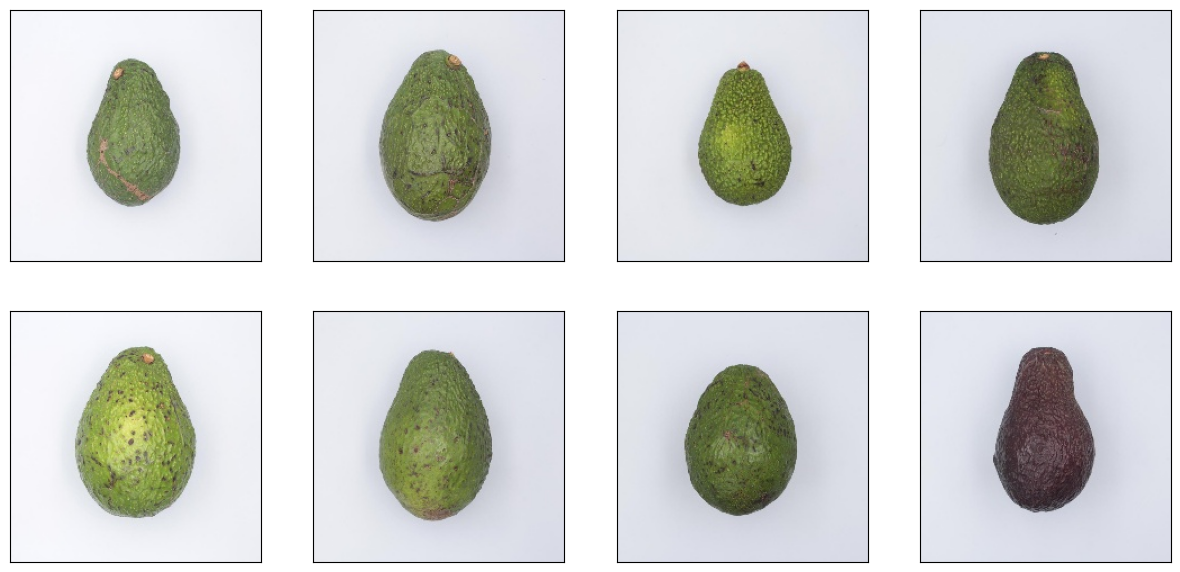

In [ ]:
#@title **CODE:** It is time to show some pulmonary nodules examples...
plt.figure(figsize=(15,15))
plt.subplot(441), plt.imshow(X_selected[0], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(442), plt.imshow(X_selected[5], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(443), plt.imshow(X_selected[7], cmap = 'gray'),plt.xticks([]), plt.yticks([]);
plt.subplot(444), plt.imshow(X_selected[8], cmap = 'gray'),plt.xticks([]), plt.yticks([]);
plt.subplot(445), plt.imshow(X_selected[50], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(446), plt.imshow(X_selected[100], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(447), plt.imshow(X_selected[200], cmap = 'gray'),plt.xticks([]), plt.yticks([]);
plt.subplot(448), plt.imshow(X_selected[3500], cmap = 'gray'),plt.xticks([]), plt.yticks([]);

In [ ]:
y_selected[3500]

5

In [ ]:
X_train_resized = X_selected.astype('float16')
X_train_resized /= 255

In [ ]:
y_selected = y_selected - 1
y_train = tf.keras.utils.to_categorical(y_selected)

In [ ]:
print("Tamaño de X_train_resized:", X_train_resized.shape)
print("Tamaño de y_train:", y_train.shape)


Tamaño de X_train_resized: (4000, 224, 224, 3)
Tamaño de y_train: (4000, 5)


In [ ]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_resized, y_train, test_size=0.1, random_state=42)
print("Tamaño de entrenamiento:", len(X_train))
print("Tamaño de validación:", len(X_val))


Tamaño de entrenamiento: 3600
Tamaño de validación: 400


In [ ]:
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(224, 224, 3)))
model_CNN.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((4, 4)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(5, activation='softmax'))
model_CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,450,981 (24.61 MB)

 Trainable params: 6,450,981 (24.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import visualkeras

visualkeras.layered_view(model_CNN).show() # display using your system viewer

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


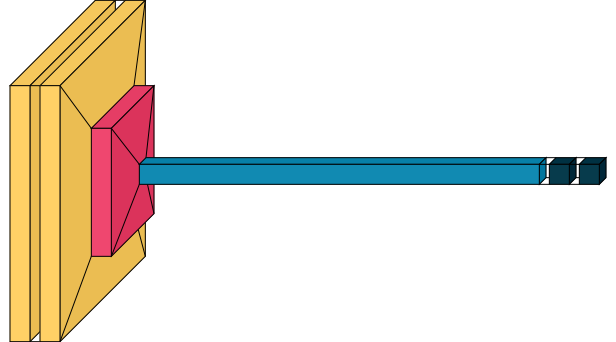

In [ ]:
visualkeras.layered_view(model_CNN)

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

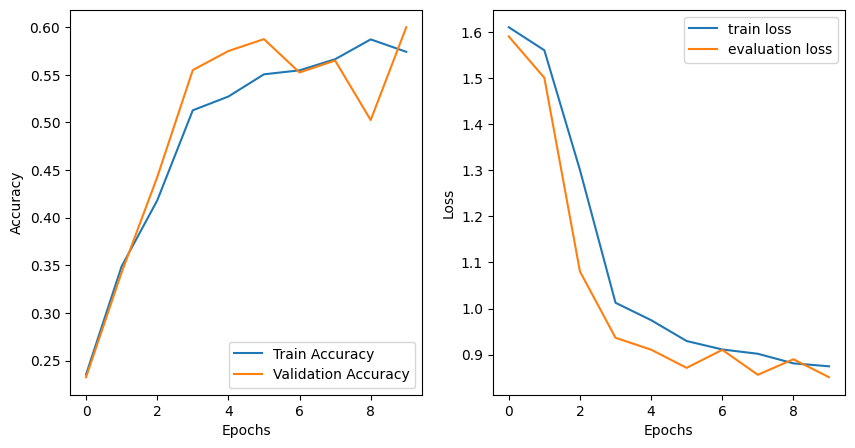

In [ ]:
history = model_CNN.fit(X_train, y_train, epochs=10 ,verbose=0, batch_size=64,validation_data=(X_val, y_val))

#Time to plot the loss and accuracy
fig = plt.figure(figsize=(10,5))

# Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

# Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
# Do the sequential model
model_in = tf.keras.models.Sequential()
model_in.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model_in.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((4, 4)))
model_in.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((4, 4)))
model_in.add(tf.keras.layers.Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((4, 4)))
model_in.add(tf.keras.layers.Flatten())
model_in.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in.add(tf.keras.layers.Dense(5, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


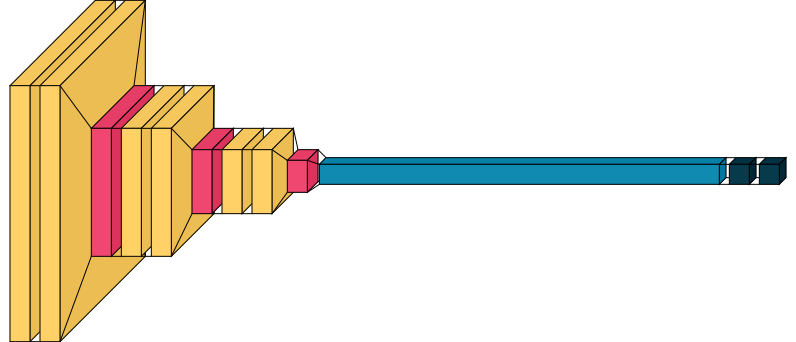

In [ ]:
visualkeras.layered_view(model_in)


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 21: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 31: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 34: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 36: early stopping


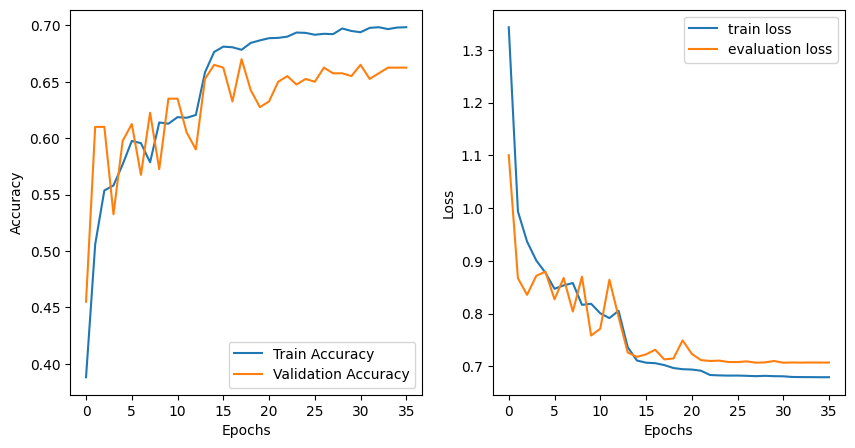

In [ ]:
#@title **Coding** Let's use a random initialization

# Time to compile
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_in.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose = 1)
callback_reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
callbacks = [callback_es, callback_reduce_lr]

# Fit the model
history = model_in.fit(X_train, y_train, epochs=40,verbose=0, batch_size=32,validation_data=(X_val, y_val),  callbacks=[callbacks])

# Plot the loss and accuracy
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
